<a href="https://colab.research.google.com/github/Mahe243/CODSOFT_TASK1/blob/main/TITANIC_SURVIVAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

In [2]:
#Load the training data
trai_data = pd.read_csv("train.csv")

In [3]:
#we use function for preprocessing the training data
def train_data(data):
    data.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)
    data['Embarked'] = data['Embarked'].fillna('S')
    data['Age'] = data['Age'].fillna(data['Age'].mean(),inplace=True)
    encoder = OrdinalEncoder()
    data['Ticket'] = encoder.fit_transform(data[['Ticket']])
    data = pd.get_dummies(data)
    return data


In [4]:
tr_data = train_data(trai_data)
tr_data.head()                                     #prints first five rows of train data


,Survived,Pclass,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,523.0,7.2500,0,1,0,0,1
1,1,1,1,0,596.0,71.2833,1,0,1,0,0
2,1,3,0,0,669.0,7.9250,1,0,0,0,1
3,1,1,1,0,49.0,53.1000,1,0,0,0,1
4,0,3,0,0,472.0,8.0500,0,1,0,0,1


In [5]:

#Load the test data
tes_data = pd.read_csv('tested.csv')


In [6]:
#we use function for preprocessing the test data
def test_data(data):
    data.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)
    data['Fare'] = data['Fare'].fillna(data['Fare'].mean(),inplace=True)
    data['Age'] = data['Age'].fillna(data['Age'].mean(),inplace=True)
    encoder = OrdinalEncoder()
    data['Ticket'] = encoder.fit_transform(data[['Ticket']])
    data = pd.get_dummies(data)
    return data


In [7]:
te_data = test_data(tes_data)
te_data.head()                                                 #prints first five rows of test data

,Survived,Pclass,SibSp,Parch,Ticket,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,0,152.0,0,1,0,1,0
1,1,3,1,0,221.0,1,0,0,0,1
2,0,2,0,0,73.0,0,1,0,1,0
3,0,3,0,0,147.0,0,1,0,0,1
4,1,3,1,1,138.0,1,0,0,0,1


In [8]:
sample = pd.read_csv("submission.csv")

In [9]:
#combining the preprocessed train and test data
data = pd.concat([tr_data, te_data], axis=0)

In [10]:
print(data.head())

   Survived  Pclass  SibSp  Parch  Ticket     Fare  Sex_female  Sex_male  \
0         0       3      1      0   523.0   7.2500           0         1   
1         1       1      1      0   596.0  71.2833           1         0   
2         1       3      0      0   669.0   7.9250           1         0   
3         1       1      1      0    49.0  53.1000           1         0   
4         0       3      0      0   472.0   8.0500           0         1   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0           0           1  
3           0           0           1  
4           0           0           1  


In [11]:

X = data.drop('Survived' ,axis=1)
Y = data['Survived']

In [12]:
#To handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [13]:
poly = PolynomialFeatures(degree=4, include_bias=False)
X_mapped = poly.fit_transform(X_imputed)

scaler = StandardScaler()
X_mapped_scaled = scaler.fit_transform(X_mapped)

In [16]:
#We Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X_mapped_scaled, Y, test_size=0.20, random_state=16)

In [17]:
#Now we train the Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
# Make predictions on the test set and calculate accuracy
yhat = model.predict(x_test)
acc = accuracy_score(y_test, yhat)
print("Accuracy on the test set:", acc)


Accuracy on the test set: 0.8740458015267175


In [23]:
train_accuracy = []
test_accuracy = []
for i in range(1, 8):
    poly = PolynomialFeatures(degree=i, include_bias=False)
    x_mapped = poly.fit_transform(X_imputed)

    scaler = StandardScaler()
    x_mapped_scaled = scaler.fit_transform(x_mapped)

    x_train, x_test, y_train, y_test = train_test_split(x_mapped_scaled, Y, test_size=0.2, random_state=16)

    model = LogisticRegression()
    model.fit(x_train, y_train)

    train_yhat = model.predict(x_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_accuracy.append(train_acc)

    test_yhat = model.predict(x_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_accuracy.append(test_acc)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

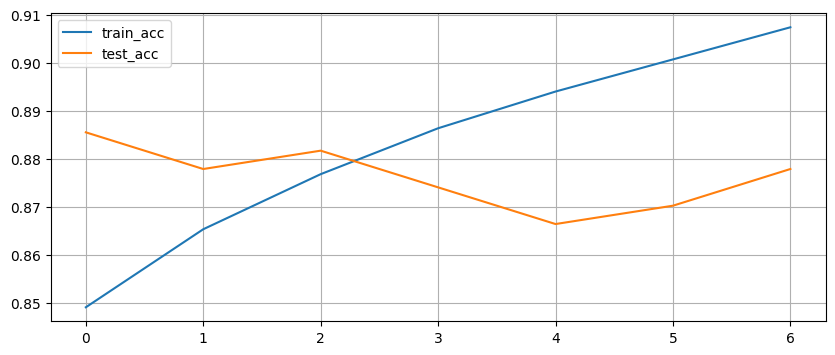

In [24]:
plt.figure(figsize=(10,4))
plt.plot(train_accuracy)
plt.plot(test_accuracy)
#plt.xticks(ticks = len(range(1, 8)), label=range(1, 8))
plt.legend(['train_acc', 'test_acc'])
plt.grid()
plt.show()